# Objectives:

1. Predict the Contract status based on available dataset.

2. Predict the Target variable- late payment- defaulter

3. EDA analysis to develop a basic understanding of risk analytics financial services.

4. Creating a Machine Learning predictive model on 'contract status' based on available dataset.

5. Understand and analyse the driving/Important variables behind loan default, i.e. the variables which are strong indicators of default.

6. Identify patterns which indicate the client has difficulty paying their installments,this ensure capable clients loan applications are not rejected.

# Importing libraries
Importing the libraries I will need and suppressing the warnings, as per advice from classes.

In [251]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from scipy import stats
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

# 

## Importing data

In [90]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

# 

# Analysing datasets

### First dataset

In [15]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [16]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [17]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
dataT=pd.DataFrame(df_app.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_app.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,LIVE_CITY_NOT_WORK_CITY,2,int64
1,FLAG_DOCUMENT_18,2,int64
2,FLAG_DOCUMENT_14,2,int64
3,FLAG_MOBIL,2,int64
4,FLAG_EMP_PHONE,2,int64
5,FLAG_WORK_PHONE,2,int64
6,FLAG_CONT_MOBILE,2,int64
7,FLAG_PHONE,2,int64
8,FLAG_EMAIL,2,int64
9,FLAG_DOCUMENT_15,2,int64


### Second dataset

In [19]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [21]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [22]:
dataT=pd.DataFrame(df_pre.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_pre.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,NFLAG_INSURED_ON_APPROVAL,2,float64
1,NFLAG_LAST_APPL_IN_DAY,2,int64
2,FLAG_LAST_APPL_PER_CONTRACT,2,object
3,NAME_PRODUCT_TYPE,3,object
4,NAME_CLIENT_TYPE,4,object
5,NAME_CONTRACT_STATUS,4,object
6,NAME_PAYMENT_TYPE,4,object
7,NAME_CONTRACT_TYPE,4,object
8,NAME_PORTFOLIO,5,object
9,NAME_YIELD_GROUP,5,object


# 

# Data Preparation

### Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [108]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


#### I will set the Pandas display format for floating point numbers to two decimal places

In [109]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430062.00,1428936.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,482581.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430153.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,623757.00,1428254.00,1184536.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,746347.00,1426762.00,1426762.00,1426762.00,1426762.00,1430154.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1413701.00,1106483.00,1413701.00,1413700.00,664161.00,1094176.00,1413701.00,1413701.00,664161.00,4791.00,4791.00,1413701.00,1413701.00,1106488.00,852595.00,852595.00,852595.00,852595.00,852595.00,852595.00
mean,278470.25,0.09,0.40,173603.62,589338.59,27042.03,529443.48,0.02,-16314.95,68602.09,-5001.28,-3034.49,11.97,1.00,0.81,0.18,1.00,0.28,0.07,2.15,2.06,2.04,11.99,0.01,0.04,0.04,0.07,0.22,0.17,0.51,0.51,0.49,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.22,0.23,0.07,0.10,0.10,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.14,0.22,0.23,0.06,0.10,0.10,0.01,0.03,0.12,0.09,0.98,0.75,0.04,0.07,

# 

## Feature Selection

In [110]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 
         'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
         'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
         'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
         'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 
         'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1430155 non-null  int64  
 1   TARGET                      1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1430155 non-null  object 
 3   CODE_GENDER                 1430155 non-null  object 
 4   FLAG_OWN_CAR                1430155 non-null  object 
 5   FLAG_OWN_REALTY             1430155 non-null  object 
 6   CNT_CHILDREN                1430155 non-null  int64  
 7   AMT_INCOME_TOTAL            1430155 non-null  float64
 8   AMT_CREDIT_x                1430155 non-null  float64
 9   AMT_ANNUITY_x               1430062 non-null  float64
 10  NAME_INCOME_TYPE            1430155 non-null  object 
 11  NAME_EDUCATION_TYPE         1430155 non-null  object 
 12  NAME_FAMILY_STATUS          1430155 non-null  object 
 1

Now we have new dataset with 25 columns and 1430154 rows.

# 

## Visual Exploratory Data Analysis

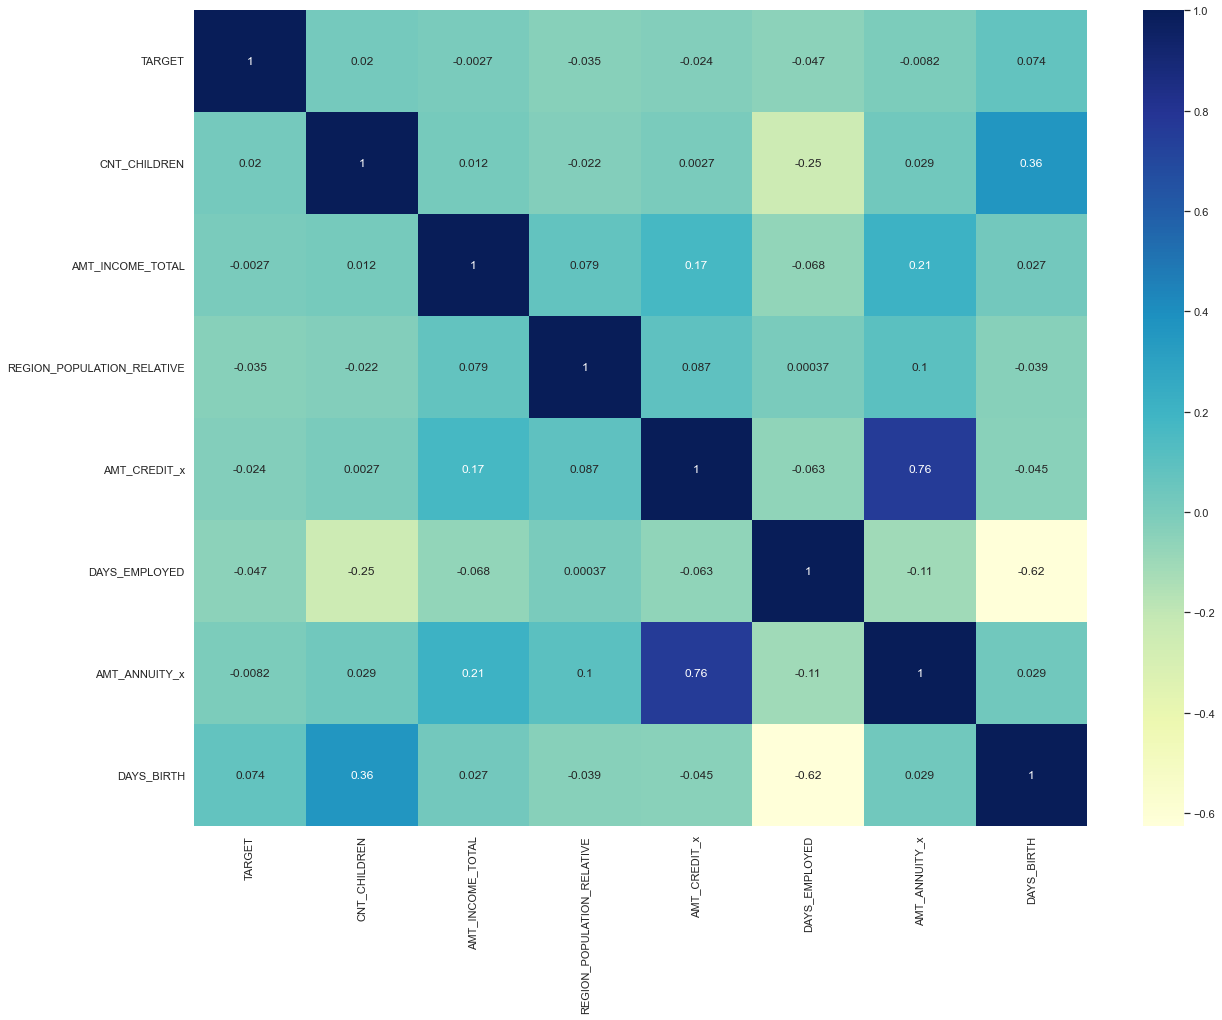

In [111]:
# Selecting relevant numerical features for correlation mapping
numerical_corr = df[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
                     'AMT_CREDIT_x', 'DAYS_EMPLOYED', 'AMT_ANNUITY_x', 'DAYS_BIRTH']]

# Plotting a heatmap to see correlations
plt.figure(figsize=(20, 15))
sns.heatmap(numerical_corr.corr(), cmap="YlGnBu", annot=True)
plt.show()

Observations:

Credit and Annuity amount has the highest correlation.
Days_Employed is less correlational with Number of Children(CNT_CHILDREN.
Target doesn't show strong correlation among any features presented in the dataset.

#### Distribution of Age groups

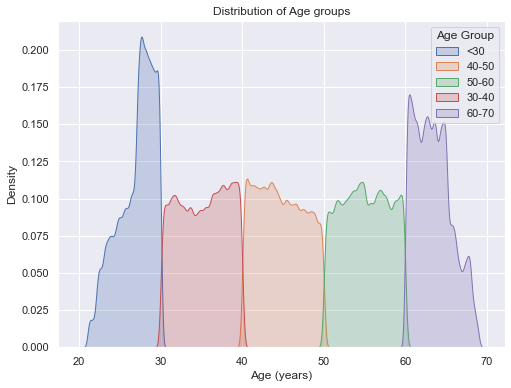

In [114]:
df['AGE_GROUP'] = pd.cut((df.DAYS_BIRTH.abs() / 365), [0, 30, 40, 50, 60, 70], 
                         labels=['<30', '30-40', '40-50', '50-60', '60-70'])
age_group_counts = df['AGE_GROUP'].value_counts()
plt.figure(figsize=(8, 6))
for age_group in df['AGE_GROUP'].unique():
    sns.kdeplot(df[df['AGE_GROUP'] == age_group]['DAYS_BIRTH'].abs() / 365, label=age_group, shade=True)

plt.title('Distribution of Age groups')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend(title='Age Group')

plt.show()

#### Gender

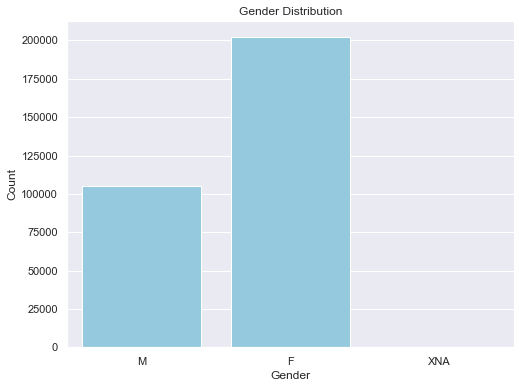

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_app, x='CODE_GENDER', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Education type

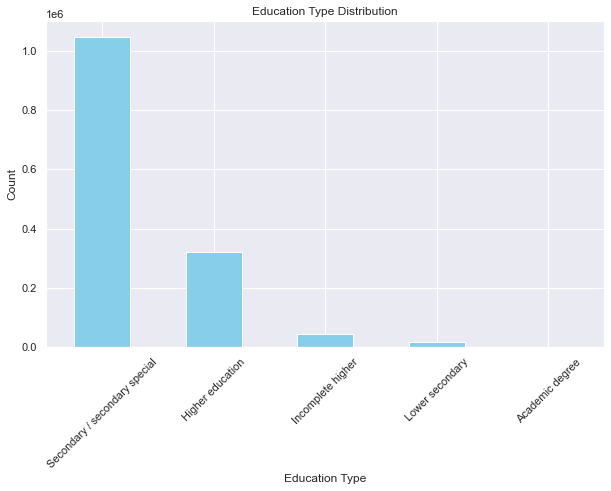

In [121]:
education_type_counts = df['NAME_EDUCATION_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
education_type_counts.plot(kind='bar', color='skyblue')
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

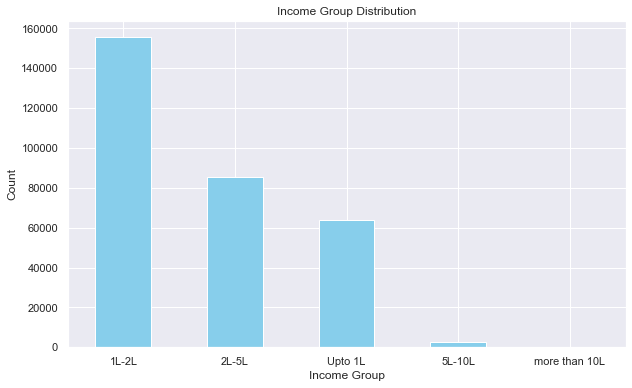

In [122]:
df['INCOME_GROUP'] = pd.cut(df_app.AMT_INCOME_TOTAL, [0, 100000, 200000, 500000, 1000000, 117000000],
                            labels=['Upto 1L', '1L-2L', '2L-5L', '5L-10L', 'more than 10L'])

# Get the value counts for 'INCOME_GROUP'
income_group_counts = df['INCOME_GROUP'].value_counts()

plt.figure(figsize=(10, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Observation:
1. Females are the majority availers of loan when compared with men.
2. Secondary education category is the highest availers of loan.
3. Age group 30-40 are the highest availers of loan and 60-70 age group is the lowest.

#### Top 10 most common incomes compared to income median

In [130]:
top_10_incomes = df['AMT_INCOME_TOTAL'].value_counts().index[:10]

fig = px.bar(x=top_10_incomes[::-1], y=range(1, len(top_10_incomes) + 1), orientation='h',
             color=top_10_incomes[::-1], labels={'y': 'Rank', 'x': 'Income Value'},
             title='Top 10 Incomes with Median', hover_name=top_10_incomes[::-1],
             template='plotly', text=top_10_incomes[::-1], color_continuous_scale='viridis_r')

fig.add_shape(type='line', x0=df['AMT_INCOME_TOTAL'].median(), x1=df['AMT_INCOME_TOTAL'].median(),
              y0=-0.5, y1=len(top_10_incomes) - 0.5, line=dict(color='red', width=2))

fig.update_layout(yaxis=dict(tickvals=list(range(len(top_10_incomes))), ticktext=list(range(1, len(top_10_incomes) + 1))))

fig.show()

Observation: It is noticeable that the count of the incomes that are higher than the median is equal to the number of incomes lower than the median, which means that income doesn't make a difference on loans.

# 

## Processing NaN values

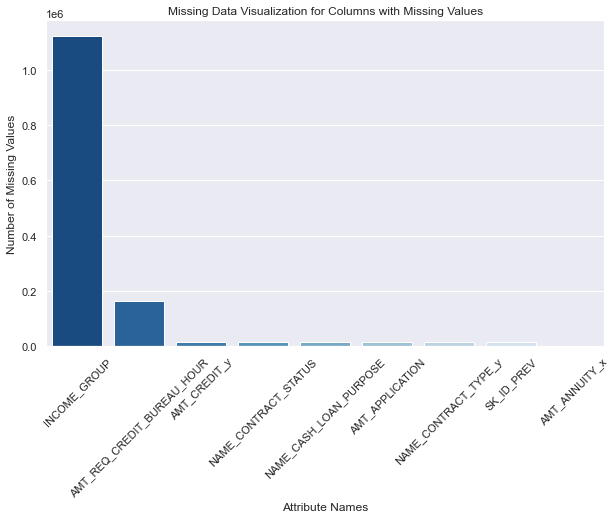

In [62]:
missing_counts = df.isnull().sum().sort_values(ascending=False)

missing_counts = missing_counts[missing_counts > 0]

colors = list(reversed(sns.color_palette("Blues", len(missing_counts))))

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts, palette=colors)
plt.title('Missing Data Visualization for Columns with Missing Values')
plt.xlabel('Attribute Names')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')

plt.show()

## Removing NaN values
Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [131]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

1387274

In [132]:
df = df.dropna()

In [133]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

0

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [134]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

214317

In [135]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54360 entries, 0 to 307506
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  54360 non-null  int64   
 1   TARGET                      54360 non-null  int64   
 2   NAME_CONTRACT_TYPE_x        54360 non-null  object  
 3   CODE_GENDER                 54360 non-null  object  
 4   FLAG_OWN_CAR                54360 non-null  object  
 5   FLAG_OWN_REALTY             54360 non-null  object  
 6   CNT_CHILDREN                54360 non-null  int64   
 7   AMT_INCOME_TOTAL            54360 non-null  float64 
 8   AMT_CREDIT_x                54360 non-null  float64 
 9   AMT_ANNUITY_x               54360 non-null  float64 
 10  NAME_INCOME_TYPE            54360 non-null  object  
 11  NAME_EDUCATION_TYPE         54360 non-null  object  
 12  NAME_FAMILY_STATUS          54360 non-null  object  
 13  NAME_HOUSING_TYPE   

#### Our finalised dataset consist of 251712 rows in 25 columns.

### Converting negative values to absolute values

In [136]:
cols_with_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
df[cols_with_negative] = df[cols_with_negative].abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved,<30,2L-5L
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved,40-50,2L-5L
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved,50-60,1L-2L
14,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved,50-60,1L-2L
20,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved,40-50,1L-2L


In [137]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,0,1,0,202500.00,406597.50,24700.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved,<30,2L-5L
1,100003,0,Cash loans,F,0,0,0,270000.00,1293502.50,35698.50,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved,40-50,2L-5L
4,100004,0,Revolving loans,M,1,1,0,67500.00,135000.00,6750.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved,50-60,1L-2L
14,100007,0,Cash loans,M,0,1,0,121500.00,513000.00,21865.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved,50-60,1L-2L
20,100008,0,Cash loans,M,0,1,0,99000.00,490495.50,27517.50,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved,40-50,1L-2L


### Getting number and names of the object columns

In [138]:
obj_cols = df.select_dtypes(include='object')
num_obj_cols = obj_cols.shape[1]
num_obj_cols

9

In [139]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS']

### Getting all unique values for each object column 

In [140]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [141]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [142]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [143]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [144]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [145]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [146]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Buying a new car', 'Medicine',
       'Furniture', 'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Payments on other loans', 'Buying a home', 'Business development',
       'Journey', 'Gasification / water supply', 'Buying a garage',
       'Hobby', 'Money for a third person'], dtype=object)

In [147]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Replacing all categorical variables with numeric values

In [181]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 
                 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 
                 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 
                 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 
                 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 
                 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 
                 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 
                 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 
                 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 
                 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 
                 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 0, 'Unused offer': 0})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,INCOME_GROUP
0,100002,1,0,0,0,1,0,202500.00,406597.50,24700.50,1,0,0,0,0.02,9461,637,3648.00,0.00,1038818.00,2,179055.00,179055.00,0,1,<30,2L-5L
1,100003,0,0,1,0,0,0,270000.00,1293502.50,35698.50,2,1,1,0,0.00,16765,1188,1186.00,0.00,1810518.00,0,900000.00,1035882.00,3,1,40-50,2L-5L
4,100004,0,1,0,1,1,0,67500.00,135000.00,6750.00,1,0,0,0,0.01,19046,225,4260.00,0.00,1564014.00,2,24282.00,20106.00,0,1,50-60,1L-2L
14,100007,0,0,0,0,1,0,121500.00,513000.00,21865.50,1,0,0,0,0.03,19932,3038,4311.00,0.00,2001242.00,0,180000.00,180000.00,3,1,50-60,1L-2L
20,100008,0,0,0,0,1,0,99000.00,490495.50,27517.50,2,0,1,0,0.04,16941,1588,4970.00,0.00,2218188.00,2,162598.50,162598.50,0,1,40-50,1L-2L


In [183]:
df = df.drop(['AGE_GROUP', 'INCOME_GROUP'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54360 entries, 0 to 307506
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  54360 non-null  int64  
 1   TARGET                      54360 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        54360 non-null  int64  
 3   CODE_GENDER                 54360 non-null  int64  
 4   FLAG_OWN_CAR                54360 non-null  int64  
 5   FLAG_OWN_REALTY             54360 non-null  int64  
 6   CNT_CHILDREN                54360 non-null  int64  
 7   AMT_INCOME_TOTAL            54360 non-null  float64
 8   AMT_CREDIT_x                54360 non-null  float64
 9   AMT_ANNUITY_x               54360 non-null  float64
 10  NAME_INCOME_TYPE            54360 non-null  int64  
 11  NAME_EDUCATION_TYPE         54360 non-null  int64  
 12  NAME_FAMILY_STATUS          54360 non-null  int64  
 13  NAME_HOUSING_TYPE           54360 n

#### Our dataset is now completely filled with numerical values only

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Approved': 1, 'Refused': 0, 'Canceled': 0, 'Unused offer': 0 (NAME_CONTRACT_STATUS is our target column where we see if customer was successful or not with application. In this case, 1 stands for Approved and that's successful customer why all other outcomems are unsuccessful, therefore 0.)


# 

## Bivariate Analysis¶

In [149]:
def bivariate_scatter(variable_x, variable_y, label_orientation=False):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 1], x=variable_x, y=variable_y, ax=ax1)
    ax1.set_title('DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 0], x=variable_x, y=variable_y, ax=ax2)
    ax2.set_title('NON-DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

#### Bivariate Analysis with Target Variable 

A scatter plot is used to understand the correlation between two numeric variables with Target variable.


Income vs Credit

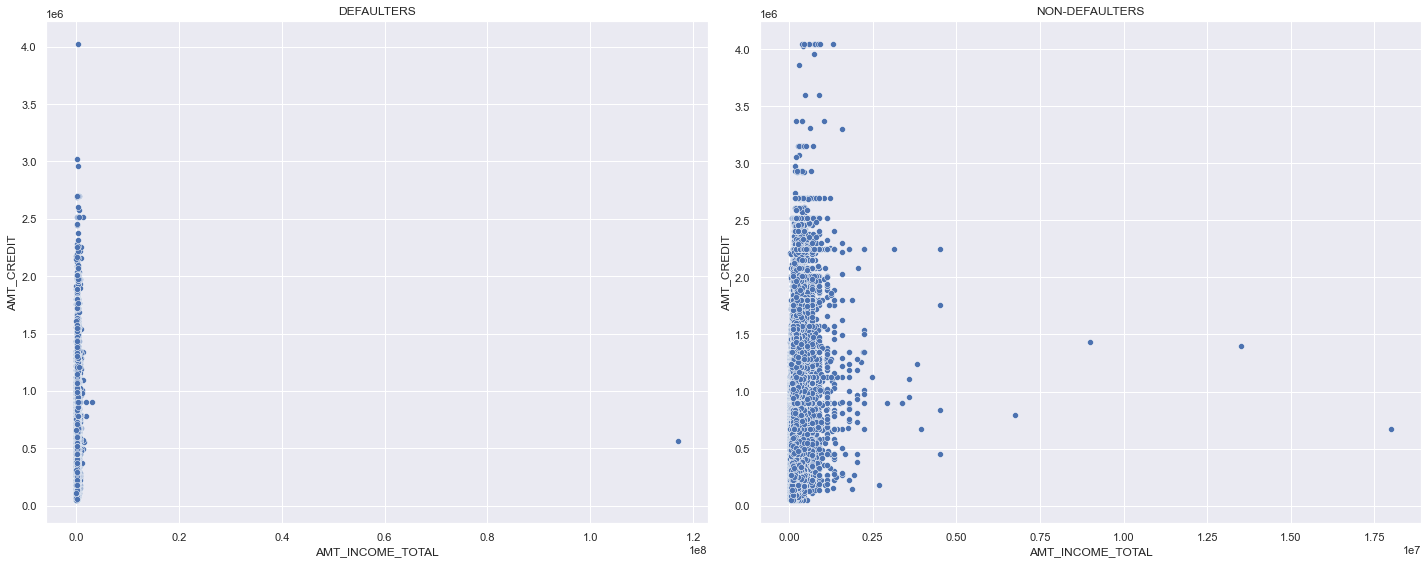

In [150]:
bivariate_scatter('AMT_INCOME_TOTAL','AMT_CREDIT')

Observations:

Payment defaulters are majority low income group people.

Also, higher credit amount is given for low income people than higher income people.

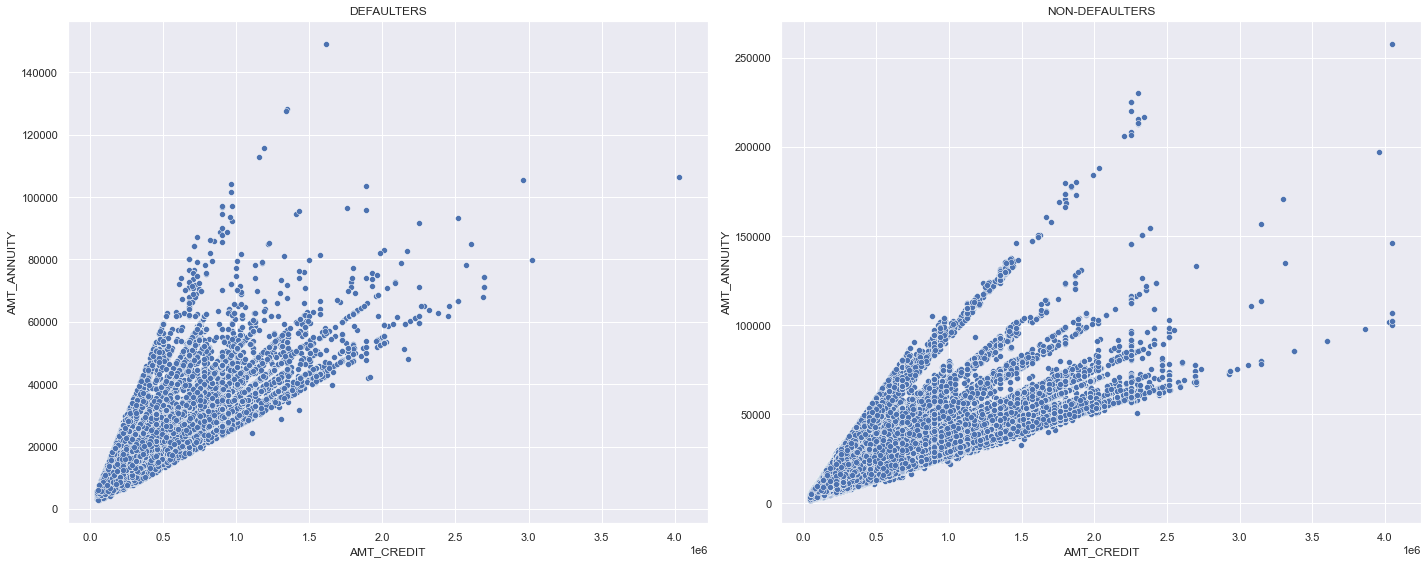

In [151]:
bivariate_scatter('AMT_CREDIT','AMT_ANNUITY')

Observations:Positive correlation observed between credit and annuity 

#### Analysising the continuous variables with target variable

In [152]:
#defining plotting function for box plots
def boxplot_target(variable,label_orientation=False):
    
    #setting subplots & fig size
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,4))
    
    #plot1
    sns.boxplot(ax=ax1,data=df_app[df_app['TARGET']==1],x=variable,showfliers=False)
    ax1.set_title('DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    #plot2
    sns.boxplot(ax=ax2,data=df_app[df_app['TARGET']==0],x=variable,showfliers=False)
    ax2.set_title('NON-DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)

    plt.show()

In [153]:
df_app['DAYS_EMPLOYED']=abs(df_app.DAYS_EMPLOYED)//365

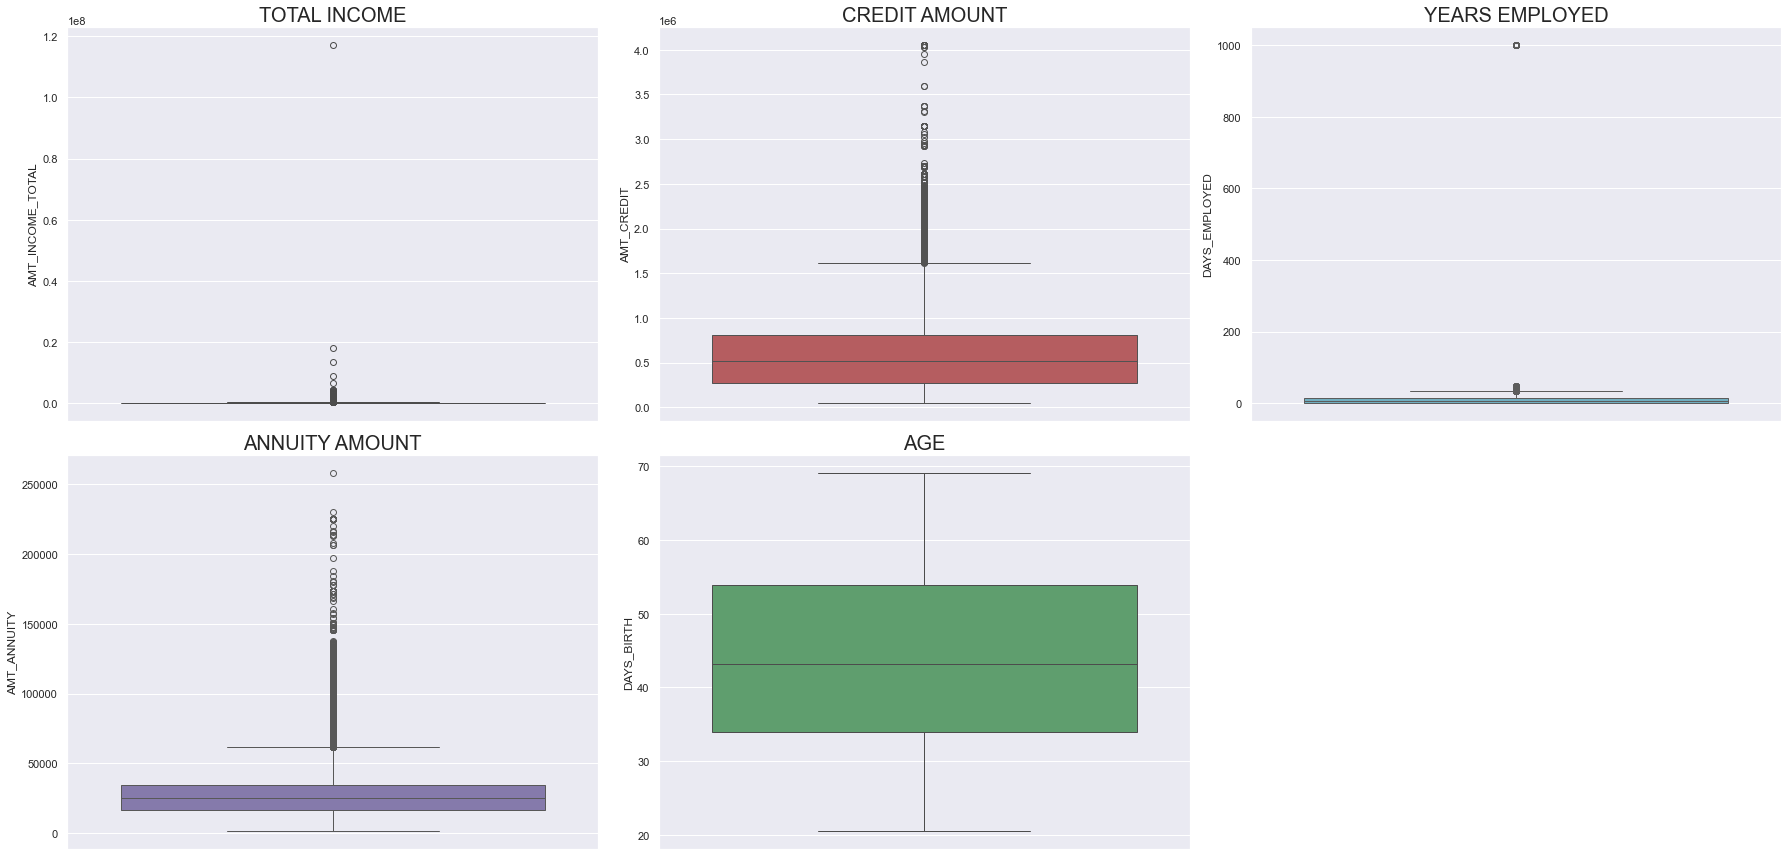

In [154]:
#Setting plot size
plt.figure(figsize = (25, 18))

#Creating Subplots

#1.Total Income
plt.subplot(3,3,1)
plt.title("TOTAL INCOME", fontsize=20)
sns.boxplot(df_app.AMT_INCOME_TOTAL,color='g')

#2.Credit Amount
plt.subplot(3,3,2)
plt.title("CREDIT AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_CREDIT,color='r')

#3.Days Employed
plt.subplot(3,3,3)
plt.title("YEARS EMPLOYED", fontsize=20)
sns.boxplot(df_app.DAYS_EMPLOYED,color='c')

#4.Annuity Amount
plt.subplot(3,3,4)
plt.title("ANNUITY AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_ANNUITY,color='m')

#5.Age
plt.subplot(3,3,5)
plt.title("AGE", fontsize=20)
sns.boxplot(abs(df_app.DAYS_BIRTH)/365,color='g')


plt.tight_layout()
plt.show()

Observation:Days of  having one outliner with value 1000 years.
Annual credit and Annual income has couple of outliners

#### Days of employment with Target variable

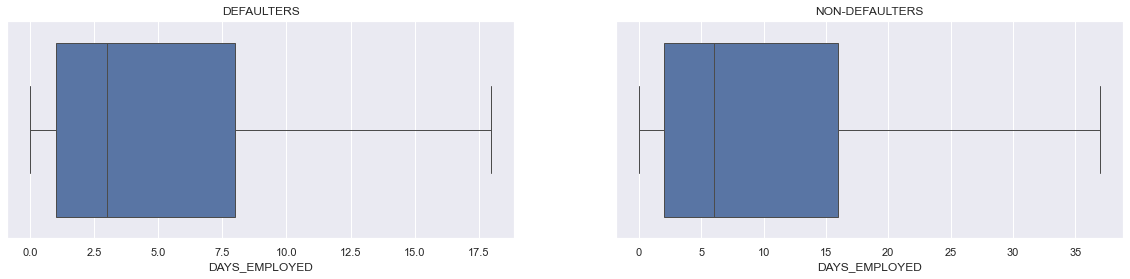

In [155]:
boxplot_target('DAYS_EMPLOYED',label_orientation=False)

Observation:Payment Defaulters have been employed for an average of less than 3 years and. having one outliner with value 1000 years
Repayers are employed for an average of 5+ years

 #### Annual Income with Target variable

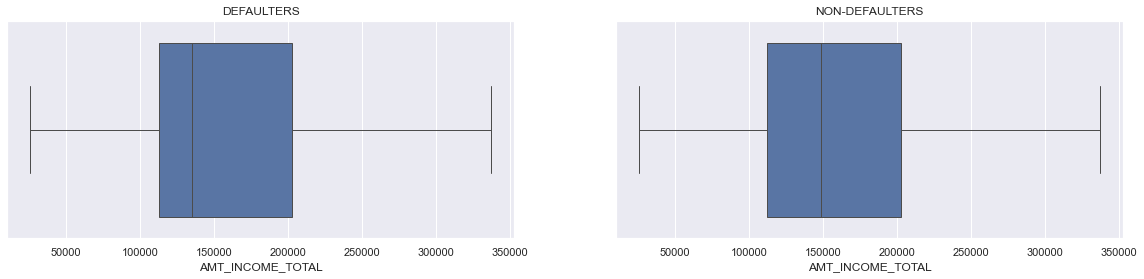

In [156]:
boxplot_target('AMT_INCOME_TOTAL',label_orientation=False)

In [157]:
#defining plotting functions
def bivariate_pivot(val,ind,col,title,label_orientation=False):
    
    #pivot table function
    table1=pd.pivot_table(data=df,values=val,index=ind,columns=col,aggfunc=np.mean)
    table1.plot(kind='bar',stacked='True',figsize=[20,10])
    plt.title(title)
    if(label_orientation==True):
        plt.xticks(rotation=45)
    plt.show() 
    print(table1)
    print(' ')
    print(df[ind].value_counts())

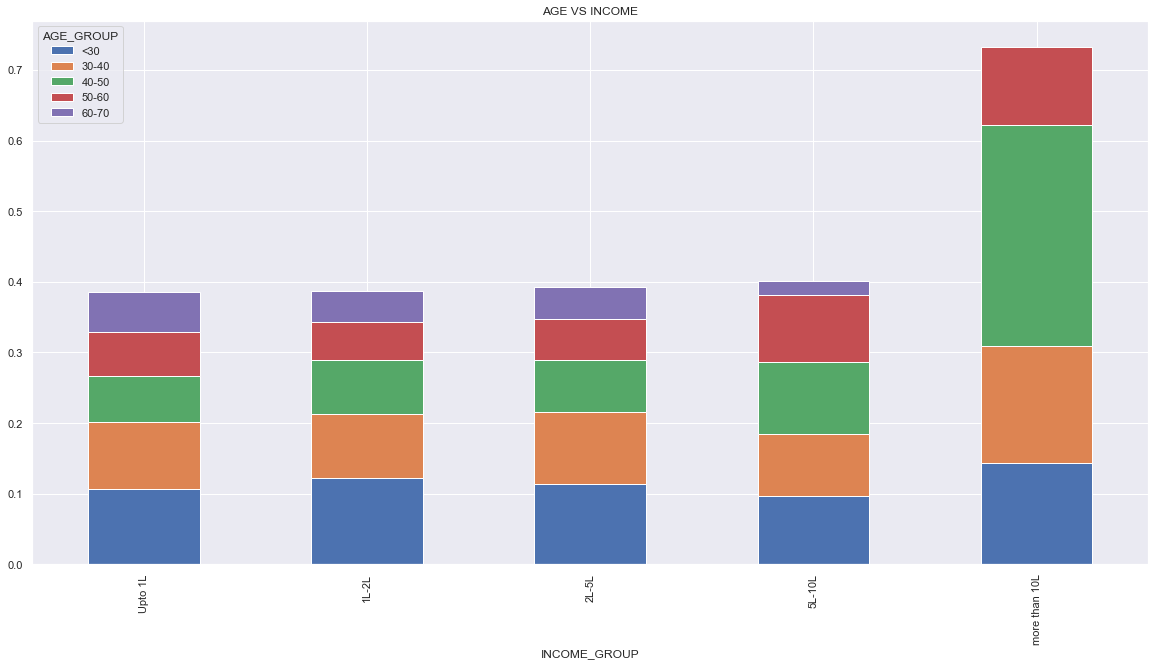

AGE_GROUP      <30  30-40  40-50  50-60  60-70
INCOME_GROUP                                  
Upto 1L       0.11   0.09   0.07   0.06   0.06
1L-2L         0.12   0.09   0.08   0.05   0.04
2L-5L         0.11   0.10   0.07   0.06   0.05
5L-10L        0.10   0.09   0.10   0.09   0.02
more than 10L 0.14   0.17   0.31   0.11   0.00
 
INCOME_GROUP
1L-2L            27634
2L-5L            15043
Upto 1L          11206
5L-10L             421
more than 10L       56
Name: count, dtype: int64


In [158]:
bivariate_pivot("TARGET",'INCOME_GROUP','AGE_GROUP','AGE VS INCOME')

Observation: Age group of <30 earning less than 1Lakh are most likely to have payment difficulties.
Income group 5L-10L shows the least chances of payment difficulty.
Income group 'more than 10L' are outliers, thus considering them as isolated events.

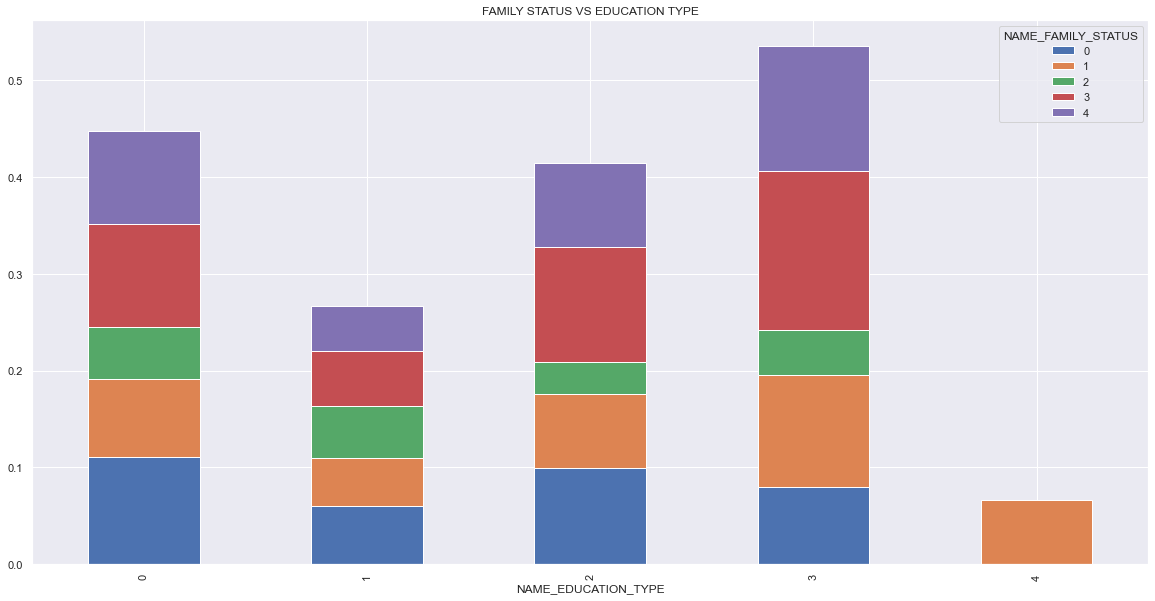

NAME_FAMILY_STATUS     0    1    2    3    4
NAME_EDUCATION_TYPE                         
0                   0.11 0.08 0.05 0.11 0.10
1                   0.06 0.05 0.05 0.06 0.05
2                   0.10 0.08 0.03 0.12 0.09
3                   0.08 0.12 0.05 0.16 0.13
4                   0.00 0.07  NaN 0.00 0.00
 
NAME_EDUCATION_TYPE
0    38896
1    13096
2     1677
3      669
4       22
Name: count, dtype: int64


In [159]:
bivariate_pivot("TARGET",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','FAMILY STATUS VS EDUCATION TYPE')

Observation:
    Lower secondary education-Civil Marriage & Single people are the most risky category exhibiting payment difficulty.
Widows have shown less percentage of payment difficulty through all Education types.
Academic degree Education type shows less chances of payment difficulty.

# 

# Defining the problem statement:

### 1. Problem statement
Create a Predictive model which can tell if application contract status is sucessful or not?

Target Variable: Contract_Status
   
Successful = 1 Application is successful
Unsuccessful = 0 Application is unsuccessful

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

### 2. Problem statement

Create a Predictive model which can tell if application Target status - late payment/Defaulters  or not ?

Target Variable: Target
   
Defaulter = 1 - late payment of loan
Non_Defaulter = 0 - non late payment of loan

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

# 

# Machine Learning

### Objective - Predict the contract_status

In [160]:
models = ['Decision Tree','Logistic Regression', 'Random Forest', 'KNN']
Prediction=['Contract_status','Target','Target','Target']

scores = []

# 

# Decision Tree Model

### Feature selection

In [161]:
feature_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 
                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
                'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 
                'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now, I will use RFE method to rank the importance of features in my dataset. Attributes with lower ranking means those are of higher importance. 

In [162]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

importance = rfe.ranking_
importance

array([13, 14, 12,  8,  5,  2,  1, 11, 10,  7, 15,  3,  1,  1,  1, 16,  6,
        4,  1,  9])

In [163]:
col_names = X.columns

feat_ranks = list(zip(col_names, rfe.ranking_))

feat_ranks_sorted = sorted(feat_ranks, key=lambda x: x[1])

for i, (col, rank) in enumerate(feat_ranks_sorted):
    print(f"{i+1}. {col}: {rank}")

1. AMT_ANNUITY_x: 1
2. DAYS_BIRTH: 1
3. DAYS_EMPLOYED: 1
4. DAYS_REGISTRATION: 1
5. AMT_CREDIT_y: 1
6. AMT_CREDIT_x: 2
7. REGION_POPULATION_RELATIVE: 3
8. AMT_APPLICATION: 4
9. AMT_INCOME_TOTAL: 5
10. NAME_CONTRACT_TYPE_y: 6
11. NAME_FAMILY_STATUS: 7
12. CNT_CHILDREN: 8
13. NAME_CASH_LOAN_PURPOSE: 9
14. NAME_EDUCATION_TYPE: 10
15. NAME_INCOME_TYPE: 11
16. FLAG_OWN_REALTY: 12
17. CODE_GENDER: 13
18. FLAG_OWN_CAR: 14
19. NAME_HOUSING_TYPE: 15
20. AMT_REQ_CREDIT_BUREAU_HOUR: 16


I will use features that are within top 3 in importance.

In [164]:
feature_cols = ['AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'AMT_CREDIT_y', 'AMT_APPLICATION', 'AMT_INCOME_TOTAL']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Splitting dataset into training set and test set (70% training and 20% test)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [166]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54360, 7), (54360,), (38052, 7), (16308, 7), (38052,), (16308,))

In [167]:
clsf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clsf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [168]:
y_pred = clsf.predict(X_test)

In [169]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("Test Accuracy (Gini):", test_accuracy)
print("Test Precision (Gini):", test_precision)
print("Test Recall (Gini):", test_recall)
print("Test F1 Score (Gini):", test_f1)

Test Accuracy (Gini): 0.8769928869266618
Test Precision (Gini): 0.8598262834545582
Test Recall (Gini): 0.9982782651471673
Test F1 Score (Gini): 0.9238940739054556


In [170]:
scores.append(clsf.score(X_test,y_test))

### Calculating Train and Test score

In [171]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.876353411121623
Test set score: 0.8769928869266618


# 

Training and Test cores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 
This model is pretty good at figuring out which applications are successful and which not, having test accuracy at 87.60% and test precision at 86.11%.  F1 score tells us that model is good at balancing both, accuracy and completeness in its predicitions. 

### Splitting dataset into training set and test set (80% training and 20% test)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [173]:
clsf2 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clsf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [174]:
y_pred = clsf2.predict(X_test)

In [175]:
test2_accuracy = accuracy_score(y_test, y_pred)
test2_precision = precision_score(y_test, y_pred)
test2_recall = recall_score(y_test, y_pred)
test2_f1 = f1_score(y_test, y_pred)

print("Test2 Accuracy (Gini):", test_accuracy)
print("Test2 Precision (Gini):", test_precision)
print("Test2 Recall (Gini):", test_recall)
print("Test2 F1 Score (Gini):", test_f1)

Test2 Accuracy (Gini): 0.8769928869266618
Test2 Precision (Gini): 0.8598262834545582
Test2 Recall (Gini): 0.9982782651471673
Test2 F1 Score (Gini): 0.9238940739054556


### Calculating Train and Test score

In [176]:
train_score = clsf2.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf2.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.8762647167034584
Test set score: 0.8779433406916851


In [177]:
scores.append(clsf2.score(X_test,y_test))

Scores of 80/20 split are pretty much the same as with 70/30 split, even slightly improved.

Conclusion:

We picked Decision Tree model for this problem as we were dealing with categorical variables which didn't need much preprocessing and this model is really good with handling those. Also, it can provide feature importance, which helped us to identify which features are most influential in making predictions. Decision Tree provides as clear and interpretable model, which is also important advantage of this model. In the context of financial or application approval, interpretability is crucial as we would like to know why certain decision was made. Last but not least, Decision Tree can serve as good starting point for understanding our data, in terms of identifying key features and trends before potentially moving to more complex models, which we will do.

# 

# PCA
Before PCA, I will perform scalling and I will use Standard Scalling.

In [257]:
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54360, 24), (54360,), (40770, 24), (13590, 24), (40770,), (13590,))

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[-1.52779009  3.16151002  0.70941084 ... -0.26428554 -0.55998136
   0.57770902]
 [-0.19646642  3.16151002  0.70941084 ...  0.48384776  1.14001913
   0.57770902]
 [ 0.19011099 -0.31630455 -1.40776066 ... -0.3411054  -0.55998136
   0.57770902]
 ...
 [ 0.69607991 -0.31630455 -1.40776066 ...  1.87205787  1.14001913
   0.57770902]
 [-1.68335127 -0.31630455 -1.40776066 ... -0.48033204 -0.55998136
   0.57770902]
 [-0.72532925  3.16151002  0.70941084 ... -0.39945591 -0.55998136
   0.57770902]] 	 [[ 1.3322777   3.16151002  0.70941084 ... -0.36288294 -0.55998136
   0.57770902]
 [ 0.23716317 -0.31630455  0.70941084 ... -0.55266339 -0.55998136
   0.57770902]
 [ 0.54589226 -0.31630455  0.70941084 ... -0.62155357  1.14001913
  -1.73097523]
 ...
 [-0.4478027  -0.31630455  0.70941084 ... -0.2070156  -0.55998136
   0.57770902]
 [-1.06070018 -0.31630455 -1.40776066 ...  1.49469134 -0.55998136
   0.57770902]
 [ 1.28070996 -0.31630455  0.70941084 ... -0.37917453 -0.55998136
   0.57770902]] 	 [[-1.7383056

In [260]:
pca = PCA()
pca.fit(X) 

PCA()

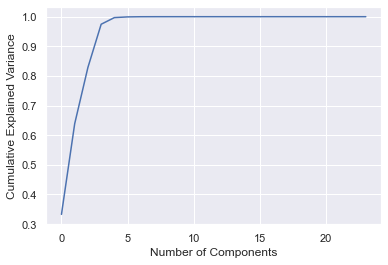

In [261]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [262]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
n_components

4

In [263]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (54360, 24)
Reduced shape: (54360, 4)


In [264]:
print(pca.explained_variance_ratio_)

[0.33289401 0.30603245 0.19007635 0.14554539]


Text(0, 0.5, 'cumulative explained variance')

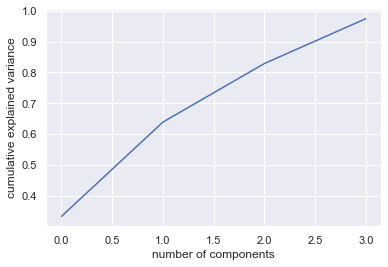

In [265]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<Axes: >

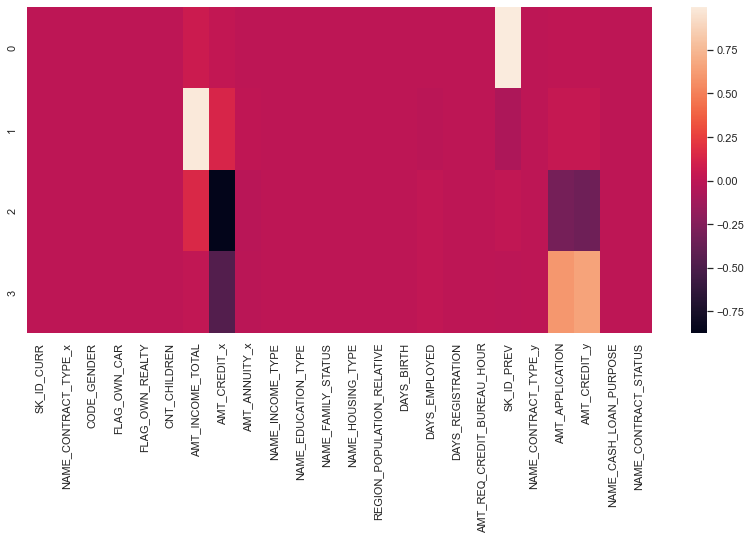

In [266]:
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
sns.heatmap(df_comp)

# Model Building

# 

## Logistic Regression



In [277]:
logreg = LogisticRegression(random_state=42)

pipeline = Pipeline([('pca', pca), ('logreg', logreg)])

In [278]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('logreg', LogisticRegression(random_state=42))])

In [279]:
y_pred = pipeline.predict(X_test_scaled)

In [280]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9206033848417955


In [281]:
train_score = pipeline.score(X_train_scaled, y_train)

test_score = pipeline.score(X_test_scaled, y_test)

print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

Training Score: 0.9219278881530537
Test Score: 0.9206033848417955


Conclusion:

Training and Test cores are, again, close to each other and the difference between them is not significant, which means, it is less likely that the model is overfitting or underfitting. 
Also, model is pretty good taking into consideration accuracy at 92.06%, which is even better than Decision Tree.

We picked Logistic regression since this is binary classification problem and Logistic Regression is a good starting point since it's interpretable, easy to implement and can serve as baseline model, which will be case in our assignmnet. 

# 

## Random Forest



In [290]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [291]:
pipeline = Pipeline([('pca', pca), ('rf_classifier', rf_classifier)])

RandomForestClassifier()


In [292]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('rf_classifier', RandomForestClassifier(random_state=42))])

In [293]:
y_pred = pipeline.predict(X_test_scaled)

In [294]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9202354672553348


In [295]:
train_score = pipeline.score(X_train_scaled, y_train)
test_score = pipeline.score(X_test_scaled, y_test)

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9578366445916114
Testing Score: 0.9202354672553348


#### Was thinking to do Hyperparameter Tuning as it goes well with Random Forest, but didn't have time. Not sure if it's needed as model scores are quite better than in CA1.

Conclusion:

Accuracy is the highest so far, out of all models - 92.02%. When it comes to training score - scores suggest that model perform really well on data it was trained on, which means that model has learned patterns in training data well. Testing score (92.02%)  is saying that model's performance on new, unseen data is also quite good. In terms of overfitting and underfitting, training and testing scores are still reasonably close to each other, which shows good balance. It shows signs of slight overfitting, but it's still doing good job in generaliziinig to new situations.

We picked Random Forest because it's reliable in predictions due to using multiple decision trees. Also, it's good with handling overfitting as introduces randomness in its tree-building process and making the model more robust. 

# 

### This is where I arrived, didn't do KNN classification and Evaluation. 

## KNN Classification

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [121]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9230549199084668


In [124]:
scores.append(model.score(X_test,y_test))

### Evalution:

In [128]:
modelComparison = pd.DataFrame()

modelComparison['Test Score'] = scores
modelComparison['Prediction']= Prediction
modelComparison.index = models
modelComparison

,Test Score,Prediction
Decision Tree,0.88,Contract_status
Logistic Regression,0.61,Target
Random Forest,0.76,Target
KNN,0.92,Target


### Conclusion